In [6]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
%conda install pandas

ERROR: Line magic function `%conda` not found.


In [8]:
import pandas

In [10]:
train_x = np.linspace(1.0, 10.0, num = 100)[:, np.newaxis]
train_y = np.sin(train_x) + 0.1* np.power(train_x, 2) + 0.5 + np.random.randn(100, 1)

with np.load("TINY_MNIST.npz") as data:
    x, t = data["x"], data["t"]
    x_eval, t_eval = data["x_eval"], data["t_eval"]
    

In [53]:
# Task 3
# get Euclidean distance

def getEucDist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

def getEucDistAll(vecToClass, vecs, resp):
    arr = [] 
    for idx, val in enumerate(vecs):
        arr.append([getEucDist(val, vecToClass), resp[idx][0]])
    arr.sort(key=lambda x: x[0])
    ed = np.asarray(arr)
    return ed

def getVote(sortedResp, K):
    p1 = np.count_nonzero(sortedResp[0:K])/K
    return p1


In [57]:
ed = getEucDistAll(x_eval[1], x, t)
getVote(ed[:,1], 300)

0.31666666666666665

<function matplotlib.pyplot.show>

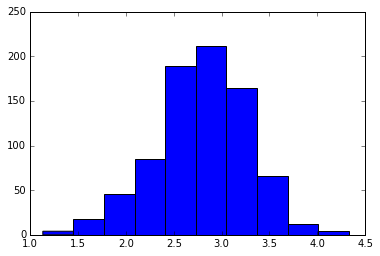

In [29]:
plt.hist(ed[:,0])
plt.show

In [40]:
np.count_nonzero(ed[0:1,1])

0

### Task 3

In [50]:
Nnei = [5, 50, 100, 200, 400, 800]
kval = [1, 3, 5, 7, 21, 101, 401]

In [52]:
x[0:40]

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.08, ...,  0.13,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.11,  0.2 ,  0.24, ...,  0.55,  0.46,  0.  ],
       [ 0.19,  0.42,  0.42, ...,  0.52,  0.22,  0.  ],
       [ 0.  ,  0.  ,  0.02, ...,  0.62,  0.17,  0.  ]])

In [193]:
def getResid(n, k, x_val, tr, resp):
    arr_comp = []
    for idx, im in enumerate(x_val):
        ed_iter = getEucDistAll(im, tr[0:n], resp[0:n])
        arr_comp.append([resp[idx][0] , getVote(ed_iter[:,1], k ) > 0.49 ])
    return arr_comp


In [194]:
df = pandas.DataFrame(res)
df.columns = ['resp', 'forec']

In [205]:
def getPrecRecall(n, k, x_val, tr, resp):
    res = getResid(n, k, x_val, tr, resp)
    df = pandas.DataFrame(res)
    df.columns = ['resp', 'forec']
    
    tps = len(df.ix[(df['resp']== 1) & (df['forec'] == 1) ])
    fps = len(df.ix[(df['resp']== 0) & (df['forec'] == 1) ])
    tns = len(df.ix[(df['resp']== 0) & (df['forec'] == 0) ])
    fns = len(df.ix[(df['resp']== 1) & (df['forec'] == 0) ])
    
    prec = tps/(tps + fps)
    reca = tps/(tps + fns)
    f1 = 2*(prec*reca)/(prec + reca)
    
    arr_ret = pandas.DataFrame.transpose(pandas.DataFrame([n, k, fps + fps , prec, reca, f1 ]))
    arr_ret.columns = ['n', 'k', 'val_err', 'prec', 'reca', 'f1']
    return arr_ret
    

In [204]:
df = getPrecRecall(800, 1, x_eval, x, t)
for ks in kval:
    df.append(getPrecRecall(800, ks, x_eval, x, t))
df

,n,k,prec,reca,f1
0,800,1,0.479167,0.46,0.469388


In [215]:
df_task1 = getPrecRecall(5, 1, x_eval, x, t).append(getPrecRecall(50, 1, x_eval, x, t)).append(getPrecRecall(100, 1, x_eval, x, t)).append(getPrecRecall(200, 1, x_eval, x, t)).append(getPrecRecall(400, 1, x_eval, x, t)).append(getPrecRecall(800, 1, x_eval, x, t))
df_task1



,n,k,val_err,prec,reca,f1
0,5,1,250,0.481328,0.580,0.526077
0,50,1,206,0.474490,0.465,0.469697
0,100,1,210,0.477612,0.480,0.478803
0,200,1,212,0.477833,0.485,0.481390
0,400,1,208,0.477387,0.475,0.476190
0,800,1,200,0.479167,0.460,0.469388


In [216]:
df_task2 = getPrecRecall(800, 1, x_eval, x, t).append(getPrecRecall(800, 3, x_eval, x, t)).append(getPrecRecall(800, 5, x_eval, x, t)).append(getPrecRecall(800, 7, x_eval, x, t)).append(getPrecRecall(800, 21, x_eval, x, t)).append(getPrecRecall(800, 101, x_eval, x, t)).append(getPrecRecall(800, 401, x_eval, x, t))

df_task2

,n,k,val_err,prec,reca,f1
0,800,1,200,0.479167,0.460,0.469388
0,800,3,208,0.480000,0.480,0.480000
0,800,5,210,0.475000,0.475,0.475000
0,800,7,208,0.477387,0.475,0.476190
0,800,21,210,0.477612,0.480,0.478803
0,800,101,210,0.467005,0.460,0.463476
0,800,401,196,0.494845,0.480,0.487310
